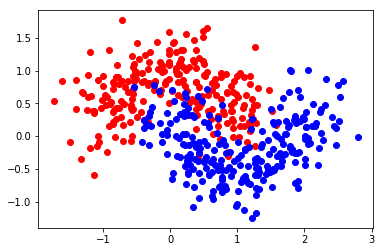

LogisticRegression 0.85
RandomForestClassifier 0.89
SVC 0.87
VotingClassifier 0.89


In [39]:
#soft voting classifer. for hard, change voting = 'hard'
from sklearn.datasets import make_moons
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint, reciprocal, uniform

X, y = make_moons(n_samples=500, shuffle=True, noise=0.3, random_state = 42)

import matplotlib.pyplot as plt
plt.plot(X[:,0][y==0], X[:,1][y==0], 'ro')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bo')
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="liblinear")
rnd_clf = RandomForestClassifier(n_estimators = 10)
svm_clf = SVC(gamma="auto", probability = True)
 
voting_clf = VotingClassifier(
            estimators = [('lr', log_clf), ('rc', rnd_clf), ('sc', svm_clf)],
            voting = 'soft'
)

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


In [55]:
#-----------bagging classifier------------

#for pasting, bootstrap = False
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500, max_samples = 100, bootstrap = True, n_jobs = -1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

ac = accuracy_score(y_test, y_pred)
print(ac)

#OOb score

bag_clf = BaggingClassifier(DecisionTreeClassifier(), oob_score = True, n_estimators = 500, max_samples = 100, bootstrap = True, n_jobs = -1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

a_t = accuracy_score(y_test, y_pred)
oob_sc = bag_clf.oob_score_
print('oob score  %f , accuracy %f' % (oob_sc, a_t))

#for every sample in test set following gives prob it belongs to certain class. For this the clf above should have the function of predict_proba
bag_clf.oob_decision_function_

#adding max_features = 2 to the bagging classifier reduces accuracy to 84 because we are checking just one feature in the 'bags'

0.9
oob score  0.920000 , accuracy 0.910000


array([[0.99493671, 0.00506329],
       [0.01336898, 0.98663102],
       [0.06958763, 0.93041237],
       [0.89817232, 0.10182768],
       [0.96428571, 0.03571429],
       [0.9974026 , 0.0025974 ],
       [0.89002558, 0.10997442],
       [0.86432161, 0.13567839],
       [0.30049261, 0.69950739],
       [0.03513514, 0.96486486],
       [0.48586118, 0.51413882],
       [0.87626263, 0.12373737],
       [0.99477807, 0.00522193],
       [0.1311054 , 0.8688946 ],
       [0.515625  , 0.484375  ],
       [0.93548387, 0.06451613],
       [0.97680412, 0.02319588],
       [1.        , 0.        ],
       [0.86397985, 0.13602015],
       [0.21323529, 0.78676471],
       [0.02077922, 0.97922078],
       [0.03753351, 0.96246649],
       [0.84803922, 0.15196078],
       [0.9525066 , 0.0474934 ],
       [0.73333333, 0.26666667],
       [0.33084577, 0.66915423],
       [0.38557214, 0.61442786],
       [1.        , 0.        ],
       [0.01305483, 0.98694517],
       [0.02163462, 0.97836538],
       [0.

In [62]:
#random forest

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

ac = accuracy_score(y_test, y_pred_rf)
print('random forest classifier: ', ac)


#baggingclasifier 
#bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42), n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42), n_estimators = 500, max_samples = 1.0, bootstrap = True, n_jobs = -1, random_state = 42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

ac = accuracy_score(y_test, y_pred)
print('bagging classifier: ', ac)


#extra trees
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs = -1,
                              random_state=42)

forest.fit(X_train, y_train)
y_predf = forest.predict(X_test)
ac = accuracy_score(y_test, y_predf)
print('extra trees classifier: ', ac)



random forest classifier:  0.89
bagging classifier:  0.89
extra trees classifier:  0.89


In [65]:
#feature importances
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)


sepal length (cm) 0.11249225099876374
sepal width (cm) 0.023119288282510326
petal length (cm) 0.44103046436395765
petal width (cm) 0.4233579963547681


In [83]:
#Adaptive boosting AdaBoost
#SAMME.R is soft votimg as it considers the predict_proba thing
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators = 200, 
                            algorithm = "SAMME.R", learning_rate = 0.5)

ada_clf.fit(X_train, y_train)

y_predf = ada_clf.predict(X_test)
ac = accuracy_score(y_test, y_predf)
print('AdaBoost classifier: ', ac)

#Gradient Boosting
from sklearn.tree import DecisionTreeClassifier

tree_c1 = DecisionTreeClassifier(max_depth = 2)
tree_c1.fit(X_train, y_train)

y2 = y_train - tree_c1.predict(X_train)

tree_c2 = DecisionTreeClassifier(max_depth = 2)
tree_c2.fit(X_train, y2)

y3 = y2 - tree_c2.predict(X_train)

tree_c3 = DecisionTreeClassifier(max_depth = 2)
tree_c3.fit(X_train, y3)

y_pred = sum(tree.predict(X_test) for tree in (tree_c1, tree_c2, tree_c3))


ac = accuracy_score(y_test, y_pred)
print('GradientBoosting classifier: ', ac)

#using the sklearn GradientBoosting to do the above
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(max_depth = 2, n_estimators = 3, learning_rate = 1.0)
gb.fit(X_train, y_train)

ac = accuracy_score(y_test, gb.predict(X_test))
print('GradientBoosting(sklearn) classifier: ', ac)

AdaBoost classifier:  0.89
GradientBoosting classifier:  0.89
GradientBoosting(sklearn) classifier:  0.9


array([0.75026781])

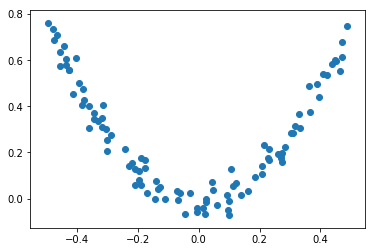

In [85]:
#Gradient boostin Regressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

plt.scatter(X,y)

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)
 
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)


y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred


In [94]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

d = gbrt.staged_predict(X_val)


errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]

bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=55, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [95]:
#early stopping manually

gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping
print(n_estimators - 5)

56
